<a href="https://colab.research.google.com/github/barbaramir/bootcamp_unimedbh_ciencia_dados/blob/main/analise_dados_diabetes/diabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

A base de dados intitulada **Diabetics prediction using logistic regression** foi retirada do site kaggle, podendo ser acessada diretamente por este [link](https://www.kaggle.com/datasets/kandij/diabetes-dataset). 

Os dados utilizados fazem parte do Banco de Dados de Diabetes dos índios Pima, sendo os pacientes analisados mulheres com 21 anos ou mais pertencentes à herança dos índios Pima (subgrupo de nativos americanos). Os dados foram coletados e disponibilizados pelo “Instituto Nacional de Diabetes e Doenças Digestivas e Renais”. 

O objetivo desse projeto é caracterizar graficamente o perfil das mulheres participantes do estudo, extraindo informações estatísticas.


## Preparação do ambiente

### Importando bibliotecas

In [2]:
#Importando os pacotes necessários 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Importando arquivo csv
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/diabetes2.csv")


### Tratamento da base de dados

Iniciaremos o tratamento de nossa base de dados avaliando uma amostragem para entender quais serãos os dados a serem analisados. Para isso utilizaremos o método head(), retornando as 5 primeiras linhas da nossa base. 

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


A fim de tornar a tabela mais legível fazemos a tradução dos nomes das colunas para o português. 

In [5]:
#Renomeando as colunas da tabela
df = df.rename(columns={"Pregnancies": "Gravidezes", "Glucose": "Glicose", "BloodPressure": "Pressão_arterial", "SkinThickness": "Espessura_pele", "Insulin": "Insulina", "BMI": "IMC", "Age": "Idade", "Outcome": "Resultado"})

In [6]:
#Conferindo os nomes das colunas
df.columns

Index(['Gravidezes', 'Glicose', 'Pressão_arterial', 'Espessura_pele',
       'Insulina', 'IMC', 'DiabetesPedigreeFunction', 'Idade', 'Resultado'],
      dtype='object')

É importante conhecer também as dimensões da base de dados que estamos trabalhando e, para isso, utilizaremos o método shape.

In [7]:
#Total de linhas e colunas
df.shape

(768, 9)

In [8]:
#Identificando os tipos de dados contidos na tabela
df.dtypes

Gravidezes                    int64
Glicose                       int64
Pressão_arterial              int64
Espessura_pele                int64
Insulina                      int64
IMC                         float64
DiabetesPedigreeFunction    float64
Idade                         int64
Resultado                     int64
dtype: object

Depois de conhecer melhor a organização de nossa base e os tipos de dados inseridos nela devemos identificar se existe algum valor ausente, que pode interferir em nossa análise.


In [9]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Gravidezes                  0
Glicose                     0
Pressão_arterial            0
Espessura_pele              0
Insulina                    0
IMC                         0
DiabetesPedigreeFunction    0
Idade                       0
Resultado                   0
dtype: int64

### Análise dos dados

Após o tratamento preliminar de nossa base, podemos iniciar a análise dos dados. Por meio do método describe() podemos identificar alguns dados estatísticos, como a média, mediana, valores mínimos e máximos de cada coluna.

In [10]:
#descrição estatística das variáveis numéricas
df.describe()

,Gravidezes,Glicose,Pressão_arterial,Espessura_pele,Insulina,IMC,DiabetesPedigreeFunction,Idade,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


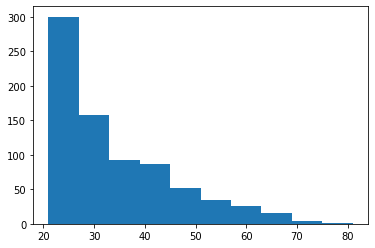

In [11]:
# Visualizando a distribuição de idade dentro do grupo analisado
plt.hist(df["Idade"]);

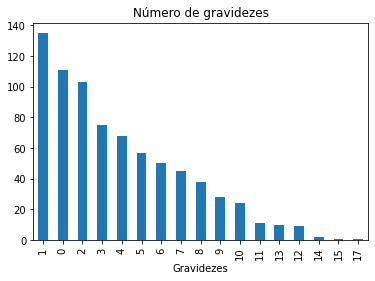

In [12]:
# Visualizando o número de gravidezes dentro do grupo analisado
df["Gravidezes"].value_counts(ascending=False).plot.bar(title="Número de gravidezes")
plt.xlabel("Gravidezes");

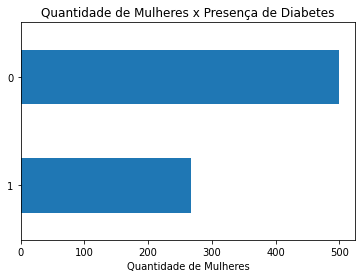

In [13]:
#Visualizando o número de mulheres versus a presença da doença
df["Resultado"].value_counts(ascending=True).plot.barh(title="Quantidade de Mulheres x Presença de Diabetes")
plt.xlabel("Quantidade de Mulheres");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


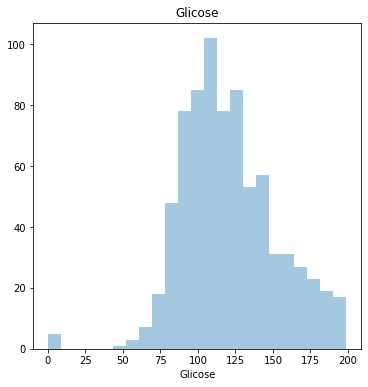

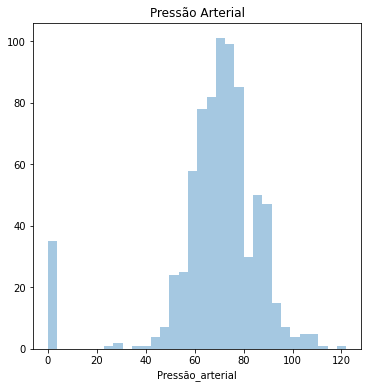

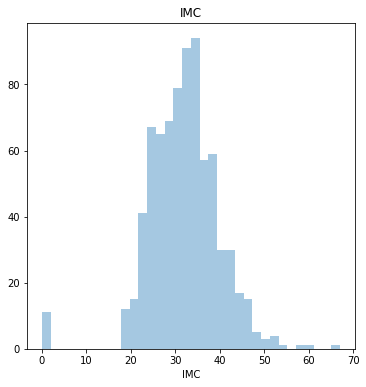

In [14]:
#Visualizando os valores de glicose, IMC e pressão arterial dentro do grupo de mulheres analisado
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Glicose")
sns.distplot(df.Glicose, kde=False)
plt.figure(figsize=(20, 6))
plt.subplot(1,3,2)
plt.title("Pressão Arterial")
sns.distplot(df.Pressão_arterial, kde=False)
plt.figure(figsize=(20, 6))
plt.subplot(1,3,3)
plt.title("IMC")
sns.distplot(df.IMC, kde=False);

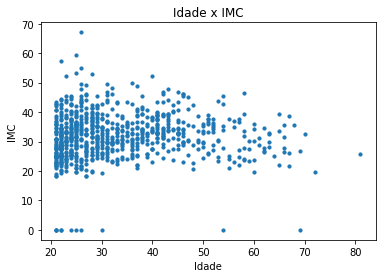

In [16]:
#Relação entre Idade x IMC
plt.scatter(x=df["Idade"], y = df["IMC"], s=10)
plt.title("Idade x IMC")
plt.xlabel("Idade")
plt.ylabel("IMC");

A partir dos histogramas acima é possível determinar algumas características do grupo estudado:
- A maior parte das mulheres se encontra na faixa etária de 20 a 30 anos. A média de idade do grupo é de 33 anos;
- A maioria das mulheres tiveram apenas 1 gravidez, sendo que a média do grupo é de 3 gravidezes;
- Aproximadamente 1/3 das mulheres apresentam diagnóstico de diabetes (resultado = 1).